# Homework 2 (Due Sep. 27) 
Problems marked with a (\*) are only required for graduate students.  Undergrads may undertake them for extra credit worth half the problems point value, with no penalties incurred for an incorrect answer.

Nicholas Thiros

## 1. Bayesian Networks/Conditional Probability

Consider three binary variables $a, b, c \in \{0, 1\}$ having the joint distribution given by  

In [1]:
import numpy as np
#        | a | b | c | P(a,b,c)
P_table = (
np.array([[0,  0,  0,  0.192 ],
          [0,  0,  1,  0.144 ],
          [0,  1,  0,  0.048 ],
          [0,  1,  1,  0.216 ],
          [1,  0,  0,  0.192 ],
          [1,  0,  1,  0.064 ],
          [1,  1,  0,  0.048 ],
          [1,  1,  1,  0.096 ]]))

# Convert P_table (which is a probability table) to a probability array, which 
# is much more computationally sensible for a discrete valued distribution
P_abc = np.zeros((2,2,2))
for entry in P_table:
    a = int(entry[0])
    b = int(entry[1])
    c = int(entry[2])
    P = entry[3]
    P_abc[a,b,c] = P
    
#print(P_abc[0,1,1])

Note that you may want to use the following functions to help you in the following problem:

In [2]:
def marginalize(P,variables_to_marginalize=(),keepdims=True):
    """ Marginalize a probability table, i.e. compute P(a,b) = sum_c P(a,b,c) 
    
        Arguments: 
        
        P (array) -> a probability array in which the dimensions correspond to random variables,
                     the indices to variable values, and the entries to probabilities
        variables_to_marginalize (tuple) -> a list of integers containing the 
                                    variable numbers to marginalize over
        keepdims (boolean) -> Marginalization reduces the dimensionality of the distribution.  keepdims=False
                       removes that dimension from the array indexing scheme.  For example P(a,b,c) has
                       an array that is 2x2x2.  If we marginalize over variable/index 1 (aka b), then the 
                       resulting array P(a,c) is 2x2 if keepdims=False (which may change the index of a 
                       given variable.  For example, after marginalizing, variable/index 1 is now c).  
                       Conversely, the array becomes 2x1x2 if keepdims=True.
    
    """
    # Sum over the axes given in variables_to_marginalize
    return np.sum(P,axis=variables_to_marginalize,keepdims=keepdims)

def condition(P,variables_to_condition=()):
    """ Condition a probability table, i.e. compute P(a|c) = P(a,c)/P(c) 
    
        Arguments: 
        
        P (array) -> a probability array in which the dimensions correspond to random variables,
                     the indices to variable values, and the entries to probabilities
        variables_to_condition (tuple) -> a list of integers containing the variables to condition on
        
        NOTE: This function always returns an array that is the same size as the input.  However, this array
        no longer sums to one as does an unconditioned joint distribution.  Instead, it sums to one only given
        a particular value of the conditioned variable/index.  For example:
        
        P_abc.sum()==1 -> True
        P_ab_given_c = condition(P_abc,variables_to_condition=(2,))
        P_ab_given_c.sum()==1 -> False
        P_ab_given_c[:,:,0].sum()==1 -> True
        P_ab_given_c[:,:,1].sum()==1 -> True
   
    """
    # find the variables to marginalize over to get the marginal distribuion of the
    # variables that we wish to condition on
    v_to_m = list(range(P.ndim))
    for v in variables_to_condition:
        v_to_m.remove(v)
    # Compute the conditional by dividing the input by the output
    return P/marginalize(P,variables_to_marginalize=tuple(v_to_m),keepdims=True)
    
P_ab = marginalize(P_abc,variables_to_marginalize=(2,)) #would this be P_bc? We are marginilzing over index 0, which is 'a'
P_a_given_b = condition(P_ab,variables_to_condition=(1,))


### Joint distribution equivalency (20 pts)
Show by direct evaluation that $P(a,b,c) = P(a)P(c|a)P(b|c)$ for all values of $a$,$b$, and $c$.

In [3]:
P_a = marginalize(P_abc, variables_to_marginalize=(1,2))
P_ca = marginalize(P_abc, variables_to_marginalize=(1))
P_bc = marginalize(P_abc, variables_to_marginalize=(0))

P_c_given_a = condition(P_ca, variables_to_condition=(0,))
P_b_given_c = condition(P_bc, variables_to_condition=(2,))

P_a_b_c = P_a * P_c_given_a * P_b_given_c

print('Joint Probability\n',P_a_b_c)
print('\nOriginal Joint Probabalities:\n',P_table[:,3])

Joint Probability
 [[[0.192 0.144]
  [0.048 0.216]]

 [[0.192 0.064]
  [0.048 0.096]]]

Original Joint Probabalities:
 [0.192 0.144 0.048 0.216 0.192 0.064 0.048 0.096]


This probability, which was obtained by applying the chain rule, is equivalent to the full joint probability table that is given.  This indicates that, indeed, this factorization is valid.

### Graph Visualization (10 pts)

Visualize the corresponding directed graph, either using graph software like [networkx](https://networkx.github.io/) or drawing it by hand.

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
rvs = ['A','B','C']

G.add_nodes_from(rvs)

G.add_edges_from([('B', 'C'),('C','A')], weight=2)
nx.draw_networkx(G, arrows=True)

plt.show()

<Figure size 640x480 with 1 Axes>

### A Trick Question in Graphs (\*) (10 pts)
Plot the graph associated with
$$
P(A,B,C,D,E) = P(A)P(C)P(B|A,C)P(D|C)P(E|D),
$$
where $A,B,C,D,E \in \{0,1\}$ with conditional probability tables
\begin{align}
P(A=1) &= 0.3 \nonumber \\
P(C=1) &= 0.7 \nonumber \\
P(B=1|A,C) &= \begin{cases} 0.3\,\mathrm{if}\,A=0,C=0\\
                          0.7\,\mathrm{if}\,A=1,C=0\\
                          0.1\,\mathrm{if}\,A=0,C=1\\
                          0.9\,\mathrm{if}\,A=1,C=1 \end{cases} \nonumber \\
P(D=1|C) &= \begin{cases}   0.4\,\mathrm{if}\,C=0\\
                          0.2\,\mathrm{if}\,C=1 \end{cases} \nonumber \\
P(E=1|D) &= \begin{cases}   0.1\,\mathrm{if}\,D=0\\
                          0.1\,\mathrm{if}\,D=1 \end{cases}. \nonumber
\end{align}
Compute the probability $P(A=1|E=1,C=1)$.  Be sure to think carefully about conditional independence before pulling out your calculator.

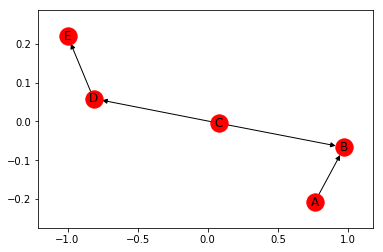

In [5]:
G = nx.DiGraph()
rvs = ['A','B','C','D','E']

G.add_nodes_from(rvs)

G.add_edges_from([('C', 'B'),('A','B'),('C','D'),('D','E')], weight=2)
nx.draw_networkx(G, arrows=True)

plt.show()

According to the graph, the probability of A is independent of the probabilities of C and E.  Hence, $$\mathrm{P(A=1|E=1,C=1)=P(A=1)=0.3}$$ This is identical to its original probability of A.

## 2.Gene Sequence Clustering

### 2a. Training a Markov model (40 pts)
Load the file genes\_training.p, which is available in this homework archive.  genes\_training.p contains 2000 sequences, with each sequence $\mathbf{s}$ consisting of 20 nucleobases $s_i \in \mathrm{Nu},\; \mathrm{Nu} = \{A,T,G,C\}$.  Each of these sequences is generated from one of two separate Markov processes.  The label (aka class) of the process that generated the sequence is given in the dataset. 

Learn the Markov model for each class given the training data.  **To do this, for each class compute the prior probability $\mathbf{\pi}_c$ of each nucleobase (the relative frequency of each nucleobase for each class, a vector of length 4) and the matrix of transition probabilities** 
$$
\mathcal{A}_{c,kj} = P(s_{i+1}=\mathrm{Nu}_j|s_{i}=\mathrm{Nu}_k),
$$ 
which is a 4 by 4 matrix.  As a quick sanity check, each row of $\mathcal{A}_c$ should sum to one.  **Using these priors and transition matrices, write a function that generates a new sequence given the class**, i.e. simulates a data point. 

In [6]:
import pickle
import numpy as np

# Define some useful constants
N_nucleobases = 4
N_classes = 2
nucleobases = ['A','T','G','C']

# Load the training data using pickle
sequences,labels = pickle.load(open('genes_training.p','rb'))


# Initialize the class priors and transition matrices
pi_0 = np.zeros((N_nucleobases))
pi_1 = np.zeros((N_nucleobases))

A_0 = np.zeros((N_nucleobases,N_nucleobases))
A_1 = np.zeros((N_nucleobases,N_nucleobases))


##### Train prior #####

# Loop over all of the sequences and labels

for s,l in zip(sequences,labels):
    sequence_length = len(s)
    for p in range(sequence_length):
        if l == 0:
            if s[p]=='A':
                pi_0[0] += 1
            elif s[p]=='T':
                pi_0[1] += 1
            elif s[p]=='G':
                pi_0[2] += 1
            elif s[p]=='C':
                pi_0[3] += 1
        if l == 1:
            if s[p]=='A':
                pi_1[0] += 1
            elif s[p]=='T':
                pi_1[1] += 1
            elif s[p]=='G':
                pi_1[2] += 1
            elif s[p]=='C':
                pi_1[3] += 1

# Convert from counts to probabilities by normalizing
pi_0/=pi_0.sum()
print('\nTraining set 0 priors [A T G C]\n',(pi_0))
pi_1/=pi_1.sum()
print('\nTraining set 1 priors [A T G C]\n',pi_1)

##### Train transition matrix #####
for s,l in zip(sequences,labels):
    sequence_length = len(s)
    for p in range(sequence_length-1):
        if l == 0:
            for i in range(len(nucleobases)):
                if s[p] == nucleobases[i]:
                    if s[p+1] == 'A':
                        A_0[i,0] += 1
                    if s[p+1] == 'T':
                        A_0[i,1] += 1
                    if s[p+1] == 'G':
                        A_0[i,2] += 1
                    if s[p+1] == 'C':
                        A_0[i,3] += 1
        if l == 1:
            for i in range(4):
                if s[p] == nucleobases[i]:
                    if s[p+1] == 'A':
                        A_1[i,0] += 1
                    if s[p+1] == 'T':
                        A_1[i,1] += 1
                    if s[p+1] == 'G':
                        A_1[i,2] += 1
                    if s[p+1] == 'C':
                        A_1[i,3] += 1
                            

# Convert from counts to probabilities by row normalization
A_0/=A_0.sum(axis=1)[:,np.newaxis]
print('\nTraining set 0 transitions [[AA AT AG AC][TA TT TG TC][GA GT GG GC][CA CT CG CC]]\n',A_0)
A_1/=A_1.sum(axis=1)[:,np.newaxis]
print('\nTraining set 1 transitions [[AA AT AG AC][TA TT TG TC][GA GT GG GC][CA CT CG CC]]\n',A_1)

#print(np.sum(A_0[0,:]))
#print(np.sum(A_0[1,:]))
#print(np.sum(A_0[2,:]))
#print(np.sum(A_0[3,:]))


##### Generate a synthetic sequence #####
def generate_new_sequence(A,pi,n=20):
    """  
    Arguments:
    A -> Nucleobase transition matrix
    pi -> Prior
    n -> length of sequence to generate
    """
    # Draw from the prior for the first nucleobase
    #s = (np.random.choice(nucleobases,1,p=pi)).astype(str)
    #seq = np.zeros(n).astype(str)
    #seq = np.chararray((20))
    #seq[0] = str(s)
    #print(seq)
    
    s = (np.random.choice(len(nucleobases),1,p=pi))
    seq = np.zeros(n)
    seq[0] = int(s)
    
    for i in range(n-1):
        #need to grab the row from A matrix that corresonds to current nucleobase
        #0=A, 1=T, 2=G 3=C
        next_base_prob = (A[int(seq[i]),:]) 
        #print(next_base_prob)
        next_base = (np.random.choice(len(nucleobases), 1, p=next_base_prob))
        seq[i+1] = int(next_base)
  
    seq = seq.astype(str)
    
    for j in range(len(seq)):
        if seq[j] == str(0.0):
            seq[j] = str('A')
        elif seq[j] == str(1.0):
            seq[j] = str('T')
        elif seq[j] == str(2.0):
            seq[j] = str('G')
        elif seq[j] == str(3.0):
            seq[j] = str('C')
    
    return seq

seq_ts0 = generate_new_sequence(A_0, pi_0, n=20)
print('\nSimulated Sequence 0\n',seq_ts0)
seq_ts1 = generate_new_sequence(A_1, pi_1, n=20)
print('\nSimulated Sequence 1\n', seq_ts1)


Training set 0 priors [A T G C]
 [0.28145 0.26535 0.31195 0.14125]

Training set 1 priors [A T G C]
 [0.332  0.1008 0.1901 0.3771]

Training set 0 transitions [[AA AT AG AC][TA TT TG TC][GA GT GG GC][CA CT CG CC]]
 [[0.22677903 0.31910112 0.42771536 0.02640449]
 [0.20329889 0.17786169 0.26331479 0.35552464]
 [0.44653982 0.30527025 0.24381209 0.00437784]
 [0.17069543 0.24581629 0.31349944 0.26998884]]

Training set 1 transitions [[AA AT AG AC][TA TT TG TC][GA GT GG GC][CA CT CG CC]]
 [[0.14585319 0.04671115 0.34429616 0.4631395 ]
 [0.24204486 0.23213354 0.40114763 0.12467397]
 [0.67282249 0.18467475 0.06174201 0.08076075]
 [0.35344226 0.0474794  0.04510543 0.55397291]]

Simulated Sequence 0
 ['G' 'G' 'A' 'T' 'C' 'G' 'A' 'T' 'T' 'G' 'A' 'T' 'C' 'G' 'A' 'A' 'T' 'G'
 'A' 'G']

Simulated Sequence 1
 ['A' 'G' 'A' 'G' 'A' 'G' 'G' 'T' 'T' 'T' 'T' 'G' 'A' 'C' 'C' 'C' 'C' 'C'
 'G' 'T']


The training set priors represent the total frequency of each nucleotide in the training set divided by the total number of nucleotides.  In training set 0, A T and G should appear about equally with C appearing less.  Training set 1 is skewed to have a higher probability of A and C occurring.  

The training set transition matrix represents the frequency of a nucleotide transitioning to another nucleotide.  This is then normalized by the total number of transitions for a given nucleotide.  In the matrices above, the first row is nucleotide A transitioning to A T G C, respectively (represented by the rows).  Row 2, 3, and 4, represent the T, G, and C transitions, repectively. What stands out in both of these transitions’ matrix is that transition from G to C is very unlikely.



### 2b. A Markov classifier (*) (20 pts)


Having the prior and transition probabilities gives you the ability to evaluate the likelihood of a sequence for a given class as:
$$
P(\mathbf{s}) = P(s_1|\mathbf{\pi}_c) \prod_{i=1}^{n-1} P(s_{i+1}|s_{i},\mathcal{A}_c),
$$
where $\mathbf{\pi}_c$ is the class-conditioned prior probability, and $\mathcal{A}_c$ is the class-conditioned transition matrix.  Comparing the computed likelihood for a given sequence between different classes forms the basis of a classifier in a very similar manner to naive Bayes.  The difference this time is that now each random variable depends on the one before it in the sequence, whereas in naive Bayes we assumed that all the random variables were independent.    

Load the file genes\_test.p, which is similar to genes\_training.p.  **For each sequence, compute the likelihood for both classes and assign a label.  Compare this predicted label to the known one, and report the test set accuracy**.  As a point of comparison, my implementation achieved 98.7\% accuracy.  

In [7]:
sequences_test,labels_test = pickle.load(open('genes_test.p','rb'))

def mapper(seq_list):
    """turns sequence of nucleobases into numbers that match the indexing of the transition matrices
    A = 0, T = 1, G =2, C = 3
    """
    nrows = len(seq_list)
    ncols = len(seq_list[0])
    sequence_nums = np.zeros((int(nrows), int(ncols)),dtype=int)
    
    for i in range(len(seq_list)):
        for j in range(len(seq_list[0])):
            if seq_list[i][j] == 'A':
                sequence_nums[i][j] = int(0)
            if seq_list[i][j] == 'T':
                sequence_nums[i][j] = int(1)
            if seq_list[i][j] == 'G':
                sequence_nums[i][j] = int(2)
            if seq_list[i][j] =='C':
                sequence_nums[i][j] = int(3)
    return sequence_nums
               
def get_likelihood(sequence, trans_mat):
    """sequence is the sequence of nucleobases in ATGC
    trans_mat is the trasition matrix from the training set
    
    This function evaluates the likelihood that a given sequence of nucleobases came from a the given traning set class
    It does this by multiplying the probability of each transition that occured together
    Hence, each sequence of the 20 nucleobases has a particular likelihood of being part of class 0 or 1"""
    sequence_nums = mapper(sequence)
    likelihood = np.ones(len(sequence_nums))

    for s in range(len(sequence_nums)): #iterate through each sequence
        for p in range(len(sequence_nums[0])-1): #iterate through each nucleobase in a sequence
            first_index = sequence_nums[s][p]
            second_index = sequence_nums[s][p+1]
            A = trans_mat[first_index, second_index]
            #print (A, [first_index,second_index])
            likelihood[s] *= A
    return likelihood

def get_prior(sequence, pri_array):
    """get the prior of for the first nucleobase based on each class of training set"""
    prior = np.array([])
    for s in sequence:
        for i in range(len(nucleobases)):
            if s[0] == nucleobases[i]:
                pri = pi_0[i]
                prior = np.append(prior, pri)
    return prior

In [8]:
#likelhood and prior for the test sequences belonging to class 0
likelihood_0 = get_likelihood(sequences_test, A_0)
prior_0 = get_prior(sequences_test, pi_0)
#likelihood and prior for the test sequences belonging to class 1
likelihood_1 = get_likelihood(sequences_test, A_1)
prior_1 = get_prior(sequences_test, pi_1)

#probability of a sequence belogning to class 0 or 1 is the likelihood multiplied by the prior
sequence_probabilities_0 = [prior_0*likelihood_0]
sequence_probabilities_1 = [prior_1*likelihood_1]

#get the odds ratio by taking the log of the probability ratio
log_like_ratio = np.log(sequence_probabilities_0) - np.log(sequence_probabilities_1)

#get the predicted classification (0 or 1) of the sequences
group = np.zeros(len(sequences_test)).astype(int)
for i in range(len(log_like_ratio[0])):
    if log_like_ratio[0][i] < 0:
        group[i] = int(1)               

#compare classification to actual sequence labels
count = 0
for z in range(len(group)):
    if int(group[z]) == int(labels_test[z]):
        count += 1

accuracy = float(count)/len(labels_test)*100


print ('Total number of sequences: ', len(labels_test))
print ('Number of sequences correctly classified: ', count)
print ('Accuracy = %.1f percent'  % (accuracy))


Total number of sequences:  1000
Number of sequences correctly classified:  988
Accuracy = 98.8 percent


An accuracy of 98.8% indicates that we correctly identified which class (0 or 1) produced the test sequences 988 out of the 1000 sequences.  This is remarkably high given this was just a first order Markov model, meaning we only had a 1 step memory.  This also seems remarkable given that (based on visual inspection) the training data priors and transitions matrices do not seem incredibly different and we were only considering a length 20 sequence.  I would expect that if longer strings were considered the statistics would be more robust and the accuracy would increase.